In [1]:
from CFD import ScalarTransportEqSolver
from sympy import symbols, exp
import matplotlib.pyplot as plt
import numpy as np
import os

Convergence achieved after 211 cycles.
Convergence achieved after 215 cycles.
Convergence achieved after 213 cycles.
Convergence achieved after 158 cycles.
Convergence achieved after 78 cycles.
Convergence achieved after 84 cycles.


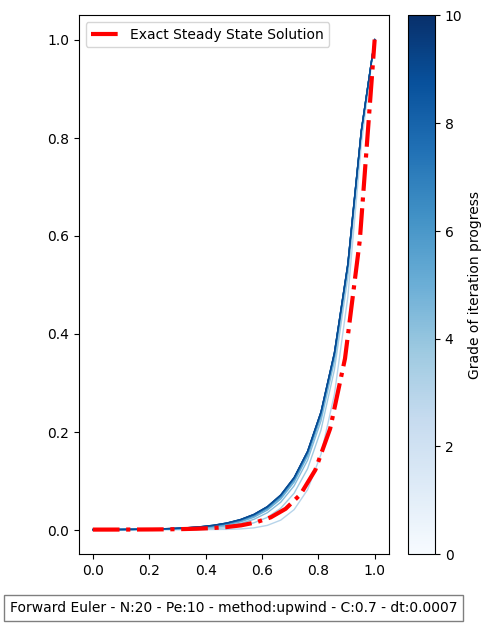

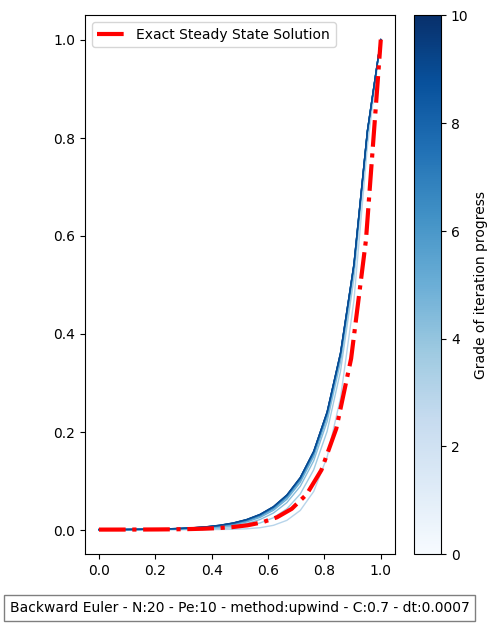

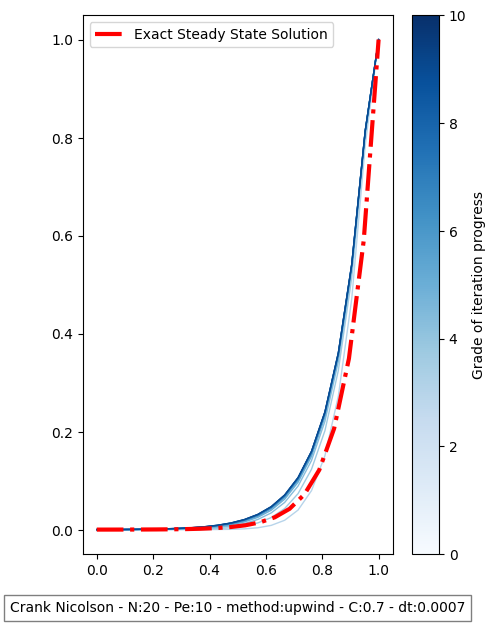

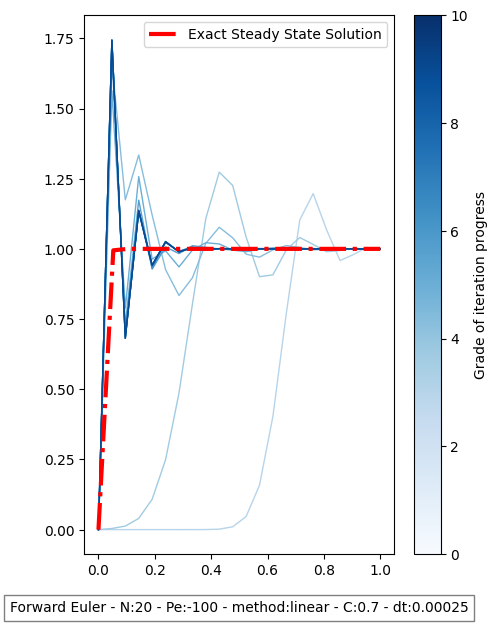

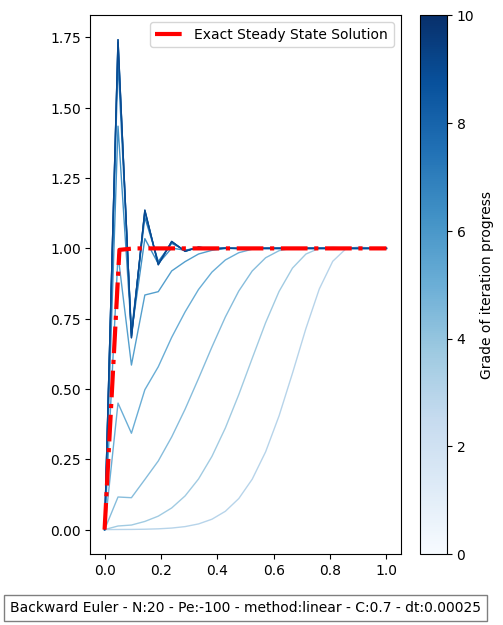

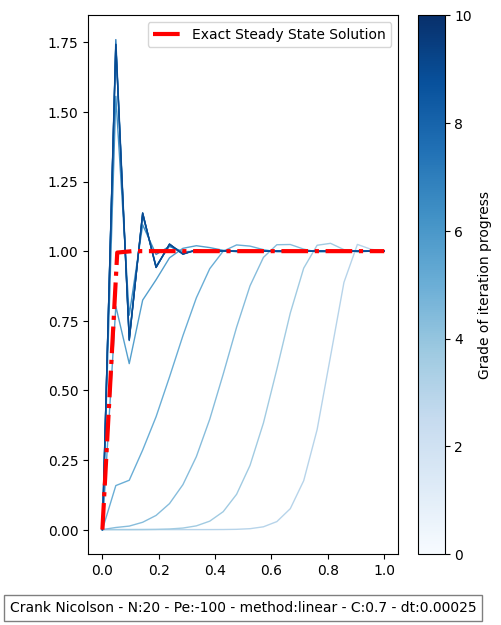

In [2]:
## Task 1.2
# Define the cases
cases = [
    {'N': 20, 'Pe': 10, 'method': 'upwind'},
    {'N':20, 'Pe':-100, 'method':'linear'}
]

# Solve and plot for each case using a for loop
for case in cases:
    for theta in [0, 1, 0.5]:
        solver = ScalarTransportEqSolver(phi_0=0, phi_N=1, N=case['N'], Pe=case['Pe'], L=1, method=case['method'], theta=theta, save_folder='Figures/Assignment2/')
        solver.add_advection()
        solver.add_diffusion()
        solver.set_BC_advection()
        solver.set_BC_diffusion()
        M = solver.compute_M()
        Nn = solver.compute_Nn()
        B = solver.compute_B()
        solver.solve_timestep(M, Nn, B)
        solver.plot_solution2()
        
    

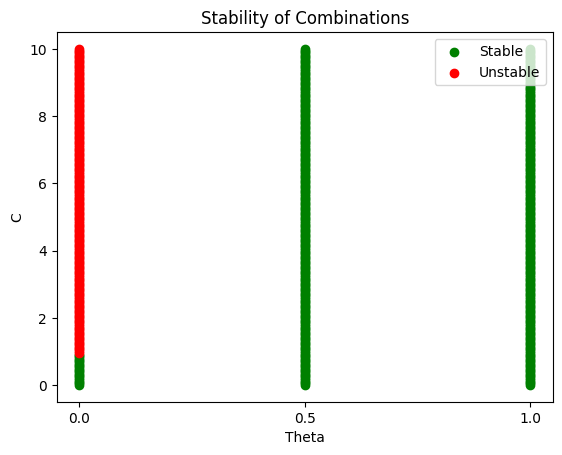

In [3]:
## Task 1.3
# Define the cases
cases = [
    {'N': 20, 'Pe': 10, 'method': 'upwind'},
]

# Initialize an empty list to store the results
results = []

# Loop through each case
for case in cases:
    for theta in [0, 1, 0.5]:
        for C in np.linspace(0.01, 10, 200):
            solver = ScalarTransportEqSolver(phi_0=0, phi_N=1, N=case['N'], Pe=case['Pe'], L=1, C=C, method=case['method'], theta=theta)
            solver.add_advection()
            solver.add_diffusion()
            solver.set_BC_advection()
            solver.set_BC_diffusion()
            M = solver.compute_M()
            Nn = solver.compute_Nn()
            B = solver.compute_B()
            stability = solver.check_stability(M, Nn)
            
            # Store the results in a dictionary
            result = {'theta': theta, 'C': C, 'stability': stability}
            results.append(result)

# Initialize lists to store stable and unstable results
stable_results = []
unstable_results = []

# Loop through each result
for result in results:
    if result['stability']:
        stable_results.append(result)
    else:
        unstable_results.append(result)

# Extract theta, C values for plotting
stable_theta = [result['theta'] for result in stable_results]
stable_C = [result['C'] for result in stable_results]
unstable_theta = [result['theta'] for result in unstable_results]
unstable_C = [result['C'] for result in unstable_results]

# Plot stable and unstable combinations
plt.scatter(stable_theta, stable_C, color='green', label='Stable')
plt.scatter(unstable_theta, unstable_C, color='red', label='Unstable')

plt.xticks([0, 1, 0.5])
plt.xlabel('Theta')
plt.ylabel('C')
plt.title('Stability of Combinations')
plt.legend()
plt.show()



In [4]:
# Filter stable results for theta = 0
stable_results_theta_0 = [result for result in stable_results if result['theta'] == 0]

# Extract theta and C values for plotting
stable_theta = [result['theta'] for result in stable_results_theta_0]
stable_C = [result['C'] for result in stable_results_theta_0]

# Identify the stability range for theta = 0
if stable_C:
    start_point = min(stable_C)
    end_point = max(stable_C)

print(start_point)
print(end_point)


0.01
0.9136180904522614


In [5]:
# ## Task 1.4
# # Define the cases
# cases = [
#     {'N': 20, 'Pe': 10, 'method': 'upwind'},
# ]

# # Initialize an empty list to store the results
# results = []

# # Loop through each case
# for case in cases:
#     for theta in np.linspace(0, 1, 300):
#         for C in np.linspace(0.01, 2, 300):
#             solver = ScalarTransportEqSolver(phi_0=0, phi_N=1, N=case['N'], Pe=case['Pe'], L=1, C=C, method=case['method'], theta=theta)
#             solver.add_advection()
#             solver.add_diffusion()
#             solver.set_BC_advection()
#             solver.set_BC_diffusion()
#             M = solver.compute_M()
#             Nn = solver.compute_Nn()
#             B = solver.compute_B()
#             stability = solver.check_stability(M, Nn)
            
#             # Store the results in a dictionary
#             result = {'theta': theta, 'C': C, 'stability': stability}
#             results.append(result)

# # Initialize lists to store stable and unstable results
# stable_results = []
# unstable_results = []

# # Loop through each result
# for result in results:
#     if result['stability']:
#         stable_results.append(result)
#     else:
#         unstable_results.append(result)

# # Extract theta, C values for plotting
# stable_theta = [result['theta'] for result in stable_results]
# stable_C = [result['C'] for result in stable_results]
# unstable_theta = [result['theta'] for result in unstable_results]
# unstable_C = [result['C'] for result in unstable_results]

# # Plot stable and unstable combinations
# plt.scatter(stable_theta, stable_C, color='green', label='Stable')
# plt.scatter(unstable_theta, unstable_C, color='red', label='Unstable')

# plt.xlabel('Theta')
# plt.ylabel('C')
# plt.title('Stability of Combinations')
# plt.legend()
# plt.show()